# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Primer-on-Orthogonal-Distance-Regression" data-toc-modified-id="Primer-on-Orthogonal-Distance-Regression-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Primer on Orthogonal Distance Regression</a></div>

# Primer on Orthogonal Distance Regression

In [1]:
import numpy as np
import scipy as scipy
import scipy.odr as odr
from scipy.stats import gaussian_kde

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc

# set to use tex, but make sure it is sans-serif fonts only
rc('text', usetex=True)
rc('text.latex', preamble=r'\usepackage{cmbright}')
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})

# bayes and mcmc
import pymc3 as pm
import theano

# Magic function to make matplotlib inline;
# other style specs must come AFTER
%matplotlib inline

# This enables SVG graphics inline. 
# There is a bug, so uncomment if it works.
%config InlineBackend.figure_formats = {'png', 'retina'}

# JB's favorite Seaborn settings for notebooks
rc = {'lines.linewidth': 2, 
      'axes.labelsize': 18, 
      'axes.titlesize': 18, 
      'axes.facecolor': 'DFDFE5'}
sns.set_context('notebook', rc=rc)
sns.set_style("dark")

mpl.rcParams['xtick.labelsize'] = 16 
mpl.rcParams['ytick.labelsize'] = 16 
mpl.rcParams['legend.fontsize'] = 14

In [2]:
x = np.linspace(0, 10, 10)
xerr = np.abs(np.random.normal(0, 1, 10))
x = np.random.normal(x, xerr, 10)

y = np.linspace(0, 20, 10)
yerr = np.abs(np.random.normal(0, 1, 10))
y = np.random.normal(y, yerr)

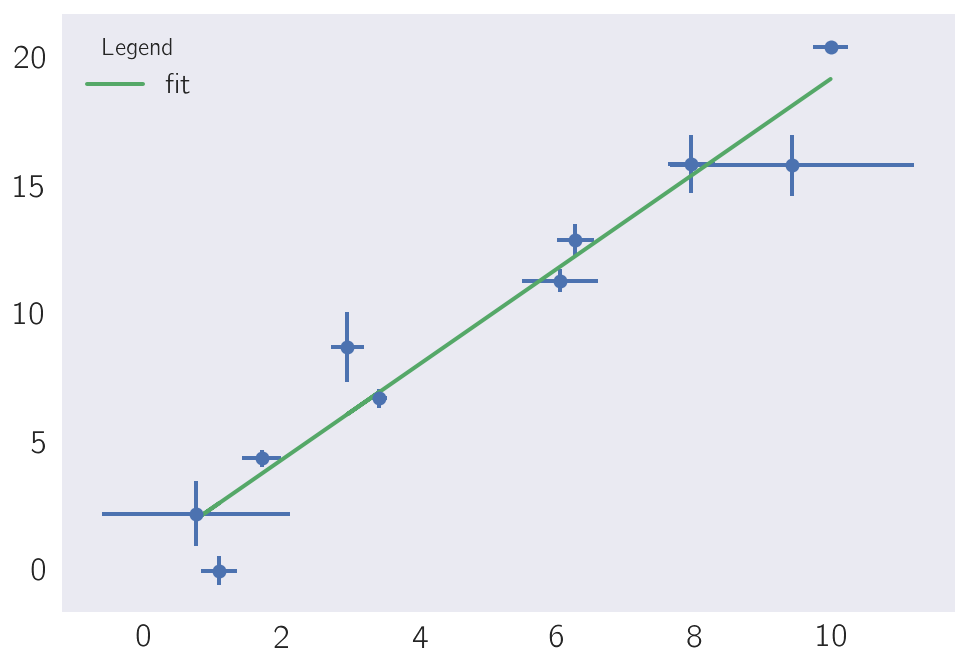

In [4]:
def line(x, a, b):
    """The line of best fit."""
    # unpack the parameters:
    y = a + b*x
    return y

popt, pcov = scipy.optimize.curve_fit(line, x, y)

# unpack the parameters of the line of best fit:
a, b = popt

plt.errorbar(x, y, xerr, yerr, 'o')
plt.plot(x, line(x, a, b), label='fit')
plt.legend(title='Legend')

In [7]:
def odr_line(p, x):
    """The line of best fit."""
    # unpack the parameters:
    y = p[0] + p[1]*x
    return y

def perform_odr(x, y, xerr, yerr):
    linear = odr.Model(odr_line)
    mydata = odr.Data(x, y, wd=1./xerr, we=1./yerr)
    myodr = odr.ODR(mydata, linear, beta0=[0, 0])
    output = myodr.run()
    return output

In [8]:
odr = perform_odr(x, y, xerr, yerr)


The true model is           y = 2x
Least squares returns       y = 0.62 + 1.9x
ODR returns                 y = -0.28 + 2.1x



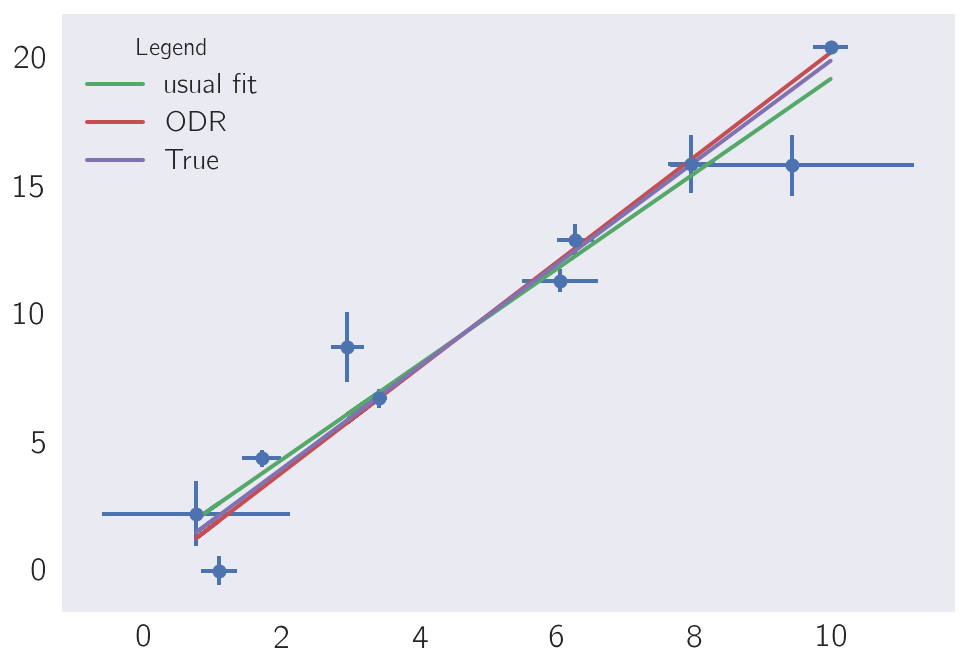

In [17]:
plt.errorbar(x, y, xerr, yerr, 'o')
plt.plot(x, line(x, a, b), label='usual fit')
plt.plot(x, line(x, odr.beta[0], odr.beta[1]), label='ODR')
plt.plot(x, 2*x, label='True')
plt.legend(title='Legend')
print(
"""
The true model is           y = 2x
Least squares returns       y = {0:.2g} + {1:.2g}x
ODR returns                 y = {2:.2g} + {3:.2g}x
""".format(a, b, odr.beta[0], odr.beta[1]))